# Gold price prediction

### import required packages

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the data set

In [225]:
df = pd.read_csv('../Database/gold_rate.csv')

### EDA 

In [226]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [227]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0
3,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2
4,2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0


In [228]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6002,2024-08-02,2444.000000,2477.000000,2416.000000,2425.699951,2425.699951,550
6003,2024-08-05,2442.000000,2449.800049,2367.399902,2401.699951,2401.699951,334
6004,2024-08-06,2414.500000,2421.800049,2380.000000,2389.100098,2389.100098,163
6005,2024-08-07,2392.199951,2401.000000,2384.500000,2390.500000,2390.500000,163
6006,2024-08-08,2422.800049,2467.899902,2420.199951,2467.399902,2467.399902,174252


In [229]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6007 non-null   object 
 1   Open       6007 non-null   float64
 2   High       6007 non-null   float64
 3   Low        6007 non-null   float64
 4   Close      6007 non-null   float64
 5   Adj Close  6007 non-null   float64
 6   Volume     6007 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 328.6+ KB


In [231]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000
mean,1137.019777,1142.683270,1131.092942,1136.949026,1136.949026,4326.952222
std,553.883724,556.971948,550.729784,553.876291,553.876291,24494.522226
min,255.000000,256.100006,255.000000,255.100006,255.100006,0.000000
25%,625.950012,628.000000,623.549988,625.750000,625.750000,20.000000
50%,1227.800049,1234.000000,1223.000000,1228.500000,1228.500000,105.000000
75%,1585.899963,1595.700012,1575.849976,1587.450012,1587.450012,397.000000
max,2472.899902,2477.000000,2454.800049,2467.399902,2467.399902,386334.000000


In [232]:
df.drop(columns=['Date'],axis=1).corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999898,0.999858,0.999788,0.999788,0.053057
High,0.999898,1.000000,0.999808,0.999880,0.999880,0.052108
Low,0.999858,0.999808,1.000000,0.999907,0.999907,0.053821
Close,0.999788,0.999880,0.999907,1.000000,1.000000,0.052872
Adj Close,0.999788,0.999880,0.999907,1.000000,1.000000,0.052872
Volume,0.053057,0.052108,0.053821,0.052872,0.052872,1.000000


In [233]:
df['date_num']=(pd.DatetimeIndex(df['Date']).year%100)*10000\
                +pd.DatetimeIndex(df['Date']).month*100 \
                +pd.DatetimeIndex(df['Date']).day

In [234]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,date_num
6002,2024-08-02,2444.000000,2477.000000,2416.000000,2425.699951,2425.699951,550,240802
6003,2024-08-05,2442.000000,2449.800049,2367.399902,2401.699951,2401.699951,334,240805
6004,2024-08-06,2414.500000,2421.800049,2380.000000,2389.100098,2389.100098,163,240806
6005,2024-08-07,2392.199951,2401.000000,2384.500000,2390.500000,2390.500000,163,240807
6006,2024-08-08,2422.800049,2467.899902,2420.199951,2467.399902,2467.399902,174252,240808


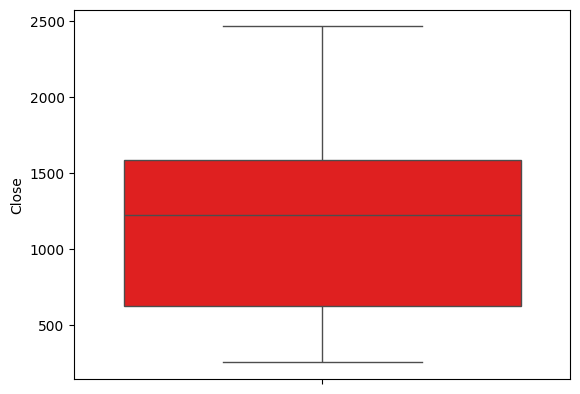

In [235]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sn
# Plotting boxplot for 'perc_premium_paid_by_cash_credit' column using the 'seaborn' library:
sn.boxplot(df['Close'],color='#FF0000')
plt.show()

/tmp/ipykernel_5554/3823500792.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['Close'],color='#0000FF')


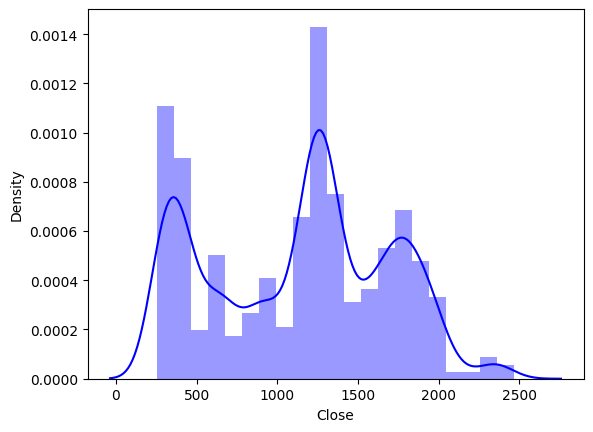

In [236]:
# Plotting the distribution of the Close column of train dataset using Histogram:
sn.distplot(df['Close'],color='#0000FF')
plt.show()

In [237]:
df['Close'].mode()

0     270.100006
1     273.899994
2    1273.699951
Name: Close, dtype: float64

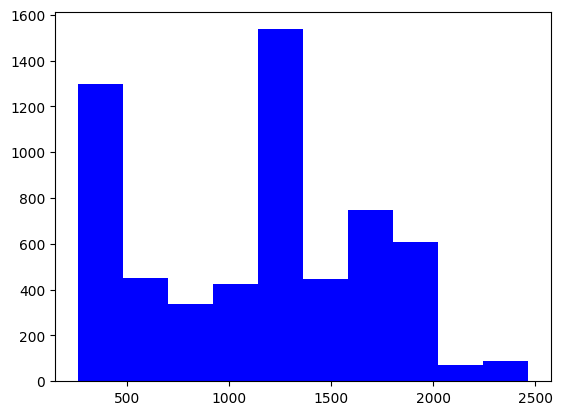

In [238]:
# Now I'll check the 'Close' column distribution:
plt.hist(df['Close'],histtype='stepfilled',label=str,color='#0000FF',bins=10)
plt.show()

In [239]:
df['Close'].value_counts()

Close
273.899994     6
270.100006     6
1273.699951    6
272.399994     5
265.700012     5
              ..
1494.500000    1
1498.300049    1
1503.199951    1
1508.599976    1
2467.399902    1
Name: count, Length: 4758, dtype: int64

In [240]:
pd.crosstab(df['date_num'],df['Close'])

Close,255.100006,255.600006,256.100006,256.799988,257.299988,257.899994,258.100006,258.200012,258.299988,258.399994,...,2421.699951,2422.899902,2425.699951,2426.500000,2433.899902,2435.000000,2451.800049,2454.800049,2462.399902,2467.399902
date_num,,,,,,,,,,,,,,,,,,,,,
830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240802,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
240805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
240806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [241]:
#df=df.drop('')

In [242]:
# corr= df.drop.corr()
# mask=np.array(corr)
# mask[np.tril_indices_from(mask)] = False
# fig,ax = plt.subplots()
# fig.set_size_inches(20,10)
# sn.heatmap(corr, mask=mask, vmax=0.9, square=True, annot=True, cmap='YlGnBu')
# plt.show()

In [243]:
#df=df.dropna()

### split the data into X and Y

In [244]:
# Define explanatory variables
df['S_3'] = df['Close'].rolling(window=3).mean()
df['S_9'] = df['Close'].rolling(window=9).mean()
df['next_day_price'] = df['Close'].shift(-1)

df = df.dropna()
x = df[['S_3', 'S_9']]

# Define dependent variable
y = df['next_day_price']

### split the data into train and test set

In [245]:
# Split the data into train and test dataset
t = .8
t = int(t*len(df))

# Train dataset
x_train = x[:t]
y_train = y[:t]

# Test dataset
x_test = x[t:]
y_test = y[t:]

In [246]:
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123456)

### model training

In [247]:
from sklearn.linear_model import LinearRegression

# create the model
model = LinearRegression()

# train the model
model.fit(x_train, y_train)

LinearRegression()

### model evaluation

In [248]:
# get the predicted data
y_pred = model.predict(x_test)

# getting the true values
y_true = y_test

In [249]:
from sklearn.metrics import mean_absolute_error

# mean absolute error (MAE)
mae = mean_absolute_error(y_true, y_pred)
mae

16.84885108919708

In [250]:
from sklearn.metrics import mean_squared_error

# mean squared error (MSE)
mse = mean_squared_error(y_true, y_pred)
mse

524.2770027503433

In [251]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_true, y_pred)
rmse

22.89709594578193

In [252]:
rmse = np.sqrt(mse)
rmse

22.89709594578193

In [253]:
from sklearn.metrics import r2_score

# R-squared score
r2 = r2_score(y_true, y_pred)
r2

0.9862080543376217

### result visualization

In [254]:
mean_values = np.ones(y.size) * y.mean()
mean_values

array([1138.24279713, 1138.24279713, 1138.24279713, ..., 1138.24279713,
       1138.24279713, 1138.24279713])

In [255]:
# from sklearn.decomposition import PCA

# #create pca object
# pca = PCA(n_components=1)

# x_train_new = pca.fit_transform(x_train)

# from sklearn.linear_model import LinearRegression

# model = LinearRegression()
# model.fit(x_train_new, y_train)

# # create new feature for testing
# x_test_new = pca.fit_transform(x_test)

# plt.scatter(x_test_new, y_test)
# plt.plot(x_test_new, model.predict(x_test_new), color='blue')
# plt.ylabel('Price')
# #plt.legend()

Linear Regression model
Gold ETF Price (y) = 1.20 * 3 Days Moving Average (x1) + -0.20 * 9 Days Moving Average (x2) + 0.96 (constant)


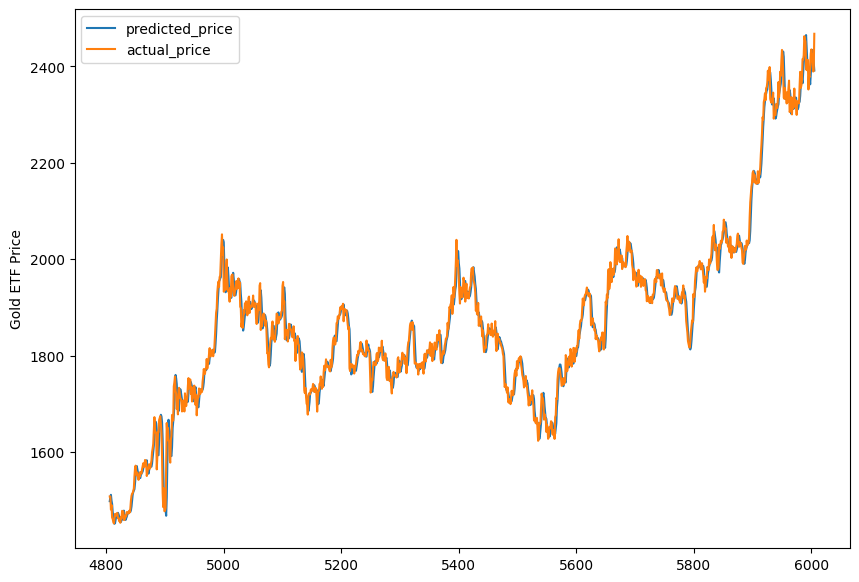

In [256]:
# Create a linear regression model
linear = LinearRegression().fit(x_train, y_train)
print("Linear Regression model")
print("Gold ETF Price (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 9 Days Moving Average (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))
# Predicting the Gold ETF prices
predicted_price = linear.predict(x_test)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold ETF Price")
plt.show()

# Linear regression with PCA

### split the data into X and Y

In [257]:
df = pd.read_csv('../Database/gold_rate.csv')
df['date_num']=(pd.DatetimeIndex(df['Date']).year%100)*10000\
                +pd.DatetimeIndex(df['Date']).month*100 \
                +pd.DatetimeIndex(df['Date']).day

In [258]:
#x = df[['Open','High','Low','date_num','Adj Close','Volume']]
x = df[['date_num']]
y = df['Close']

In [259]:
### split the data into train and test set

In [260]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123456)

In [261]:
from sklearn.linear_model import LinearRegression

# create the model
LR_model = LinearRegression()

# train the model
LR_model.fit(x_train, y_train)

LinearRegression()

### model evaluation

In [262]:
# get the predicted data
y_pred = LR_model.predict(x_test)

# getting the true values
y_true = y_test

In [263]:
from sklearn.metrics import mean_absolute_error

# mean absolute error (MAE)
mae = mean_absolute_error(y_true, y_pred)
mae

166.57987596710916

In [264]:
from sklearn.metrics import mean_squared_error

# mean squared error (MSE)
mse = mean_squared_error(y_true, y_pred)
mse

52429.61518651082

In [265]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_true, y_pred)
rmse

228.9751409793448

In [266]:
rmse = np.sqrt(mse)
rmse

228.9751409793448

In [267]:
from sklearn.metrics import r2_score

# R-squared score
r2 = r2_score(y_true, y_pred)
r2

0.8289529446049237

### result visualization

In [268]:
mean_values = np.ones(y.size) * y.mean()
mean_values

array([1136.94902567, 1136.94902567, 1136.94902567, ..., 1136.94902567,
       1136.94902567, 1136.94902567])

Text(0, 0.5, 'Price')

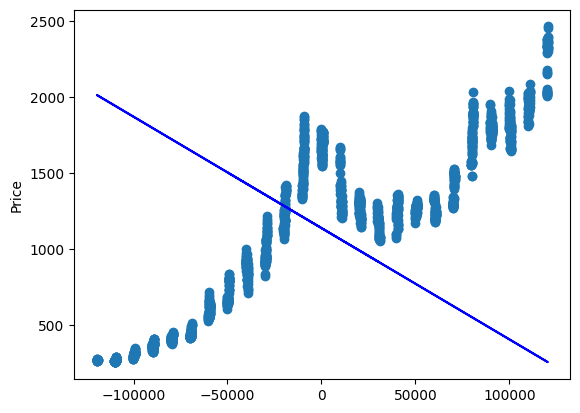

In [269]:
from sklearn.decomposition import PCA

#create pca object
pca = PCA(n_components=1)

x_train_new = pca.fit_transform(x_train)

from sklearn.linear_model import LinearRegression

LR_PCA_model = LinearRegression()
LR_PCA_model.fit(x_train_new, y_train)

# create new feature for testing
x_test_new = pca.fit_transform(x_test)

plt.scatter(x_test_new, y_test)
plt.plot(x_test_new, LR_PCA_model.predict(x_test_new), color='blue')
plt.ylabel('Price')
#plt.legend()

# Prediction (test)

In [270]:
# given_age=pd.DataFrame({'age':[58,30,20,49,53]})
# y_pred=model.predict(given_age)
# print(y_pred)

In [271]:
# pred_result=given_age.assign(bought_insurance=y_pred)
# pred_result

In [272]:
#given_date=pd.DataFrame({'date_num':[241102,241203,240802]})
#y_pred=model.predict(given_date)


given_date=pd.DataFrame({'date':['2021-02-21','2024-08-12','2025-02-11','2002-03-12']})
#given_date=pd.DataFrame({'date_num':[2021-02-21,2024-08-12,2025-02-11,2002-03-12]})
#given_date=pd.DataFrame({'date_num':["2021-02-21","2024-08-12","2025-02-11","2002-03-12"]})
given_date['date_num']=(pd.DatetimeIndex(given_date['date']).year%100)*10000\
                +pd.DatetimeIndex(given_date['date']).month*100 \
                +pd.DatetimeIndex(given_date['date']).day
y_pred=LR_model.predict(given_date[['date_num']])
print(y_pred)

[1775.76036393 1999.44635772 2068.17325961  387.11718797]


In [273]:
pred_result=given_date.assign(LR_Close=y_pred)
pred_result

,date,date_num,LR_Close
0,2021-02-21,210221,1775.760364
1,2024-08-12,240812,1999.446358
2,2025-02-11,250211,2068.173260
3,2002-03-12,20312,387.117188


In [274]:
#given_date[['date_num']].info()

In [275]:
given_date=pd.DataFrame({'date':['2021-02-21','2024-08-12','2025-02-11','2002-03-12']})
#given_date=pd.DataFrame({'date_num':[2021-02-21,2024-08-12,2025-02-11,2002-03-12]})
#given_date=pd.DataFrame({'date_num':["2021-02-21","2024-08-12","2025-02-11","2002-03-12"]})
given_date['date_num']=(pd.DatetimeIndex(given_date['date']).year%100)*10000\
                +pd.DatetimeIndex(given_date['date']).month*100 \
                +pd.DatetimeIndex(given_date['date']).day

#given_date_num=pd.DataFrame({'date_num':[241102,241203,240802,101212]})
y_pred=LR_PCA_model.predict(given_date[['date_num']])
print(y_pred)

[-398.87832752 -622.56432131 -691.2912232   989.76484844]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [276]:
pred_result=given_date.assign(LR_PCA_Close=y_pred)
pred_result

,date,date_num,LR_PCA_Close
0,2021-02-21,210221,-398.878328
1,2024-08-12,240812,-622.564321
2,2025-02-11,250211,-691.291223
3,2002-03-12,20312,989.764848


In [277]:
#x = df.drop(['Close','Date'], axis=1)
x = df[['date_num']]
y = df['Close']

In [278]:
from sklearn.linear_model import LinearRegression

new_lr_model = LinearRegression()
new_lr_model.fit(x, y)

LinearRegression()

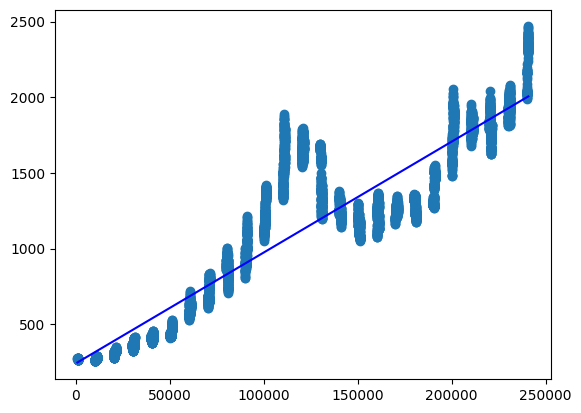

In [279]:
plt.scatter(x['date_num'], y, label="data")
plt.plot(x['date_num'], new_lr_model.predict(x), color="blue")


In [280]:
### Polynomial Model Building

from sklearn.preprocessing import PolynomialFeatures

# create a encoder object
polynomial_features = PolynomialFeatures(degree=2)

# preprocess the data to get the polynomials of X
x_polynomial = polynomial_features.fit_transform(x)
x_polynomial

array([[1.00000000e+00, 8.30000000e+02, 6.88900000e+05],
       [1.00000000e+00, 8.31000000e+02, 6.90561000e+05],
       [1.00000000e+00, 9.01000000e+02, 8.11801000e+05],
       ...,
       [1.00000000e+00, 2.40806000e+05, 5.79875296e+10],
       [1.00000000e+00, 2.40807000e+05, 5.79880112e+10],
       [1.00000000e+00, 2.40808000e+05, 5.79884929e+10]])

In [281]:
### Create linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_polynomial, y)

LinearRegression()

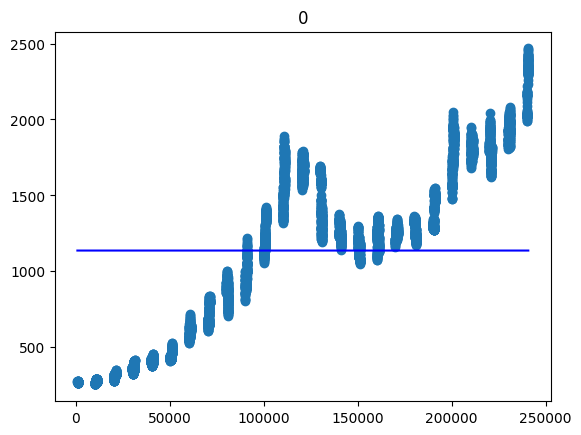

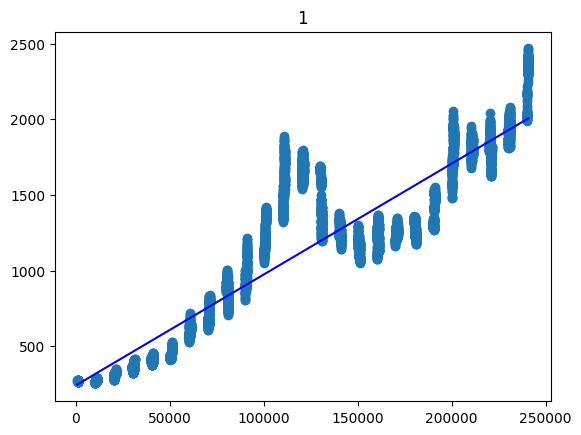

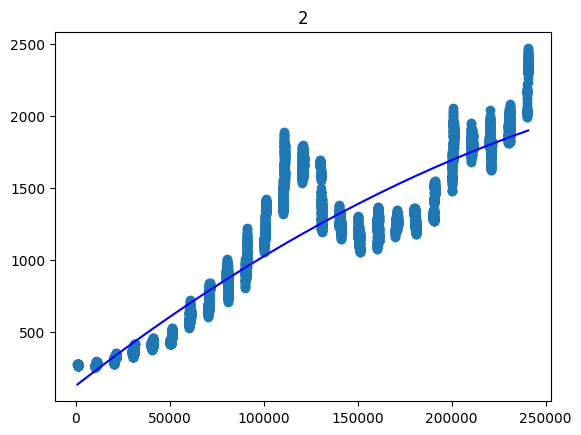

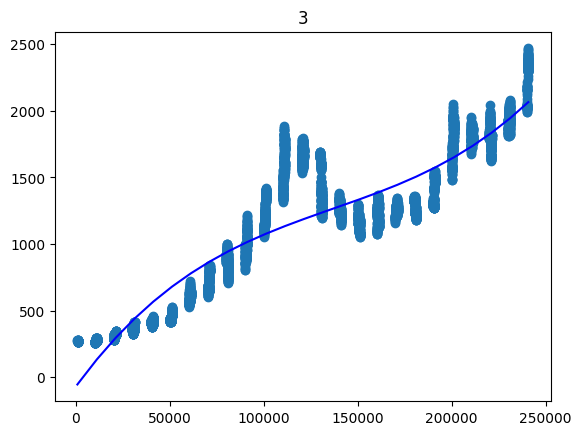

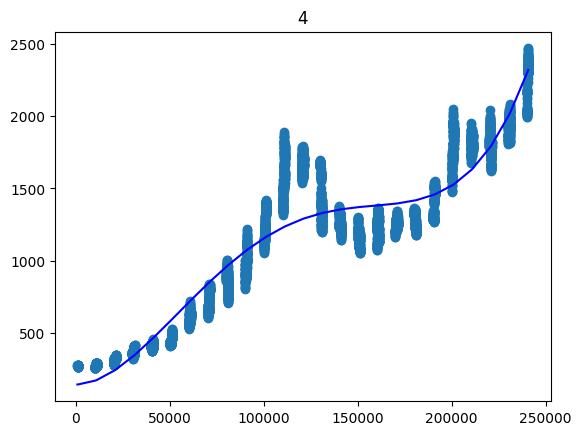

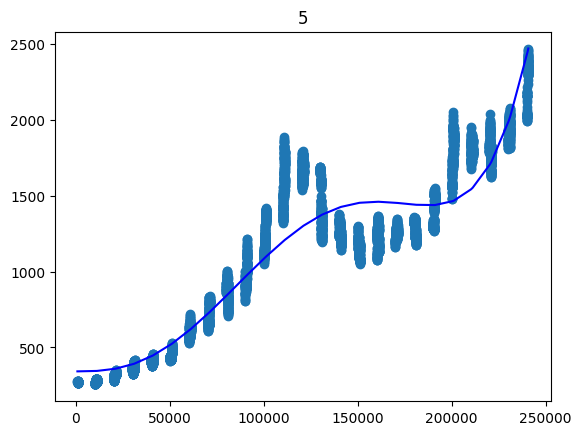

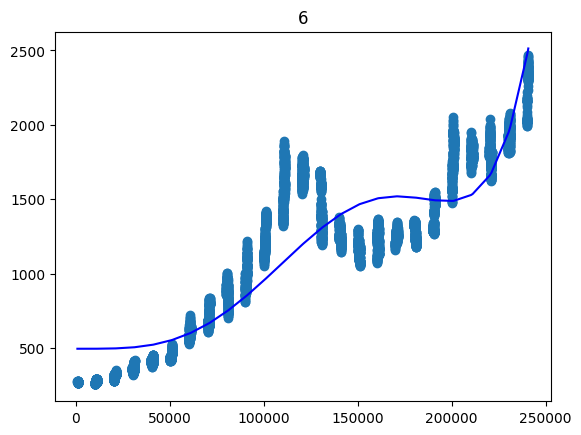

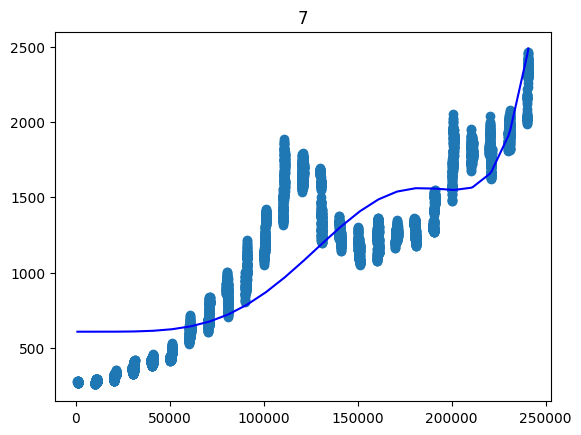

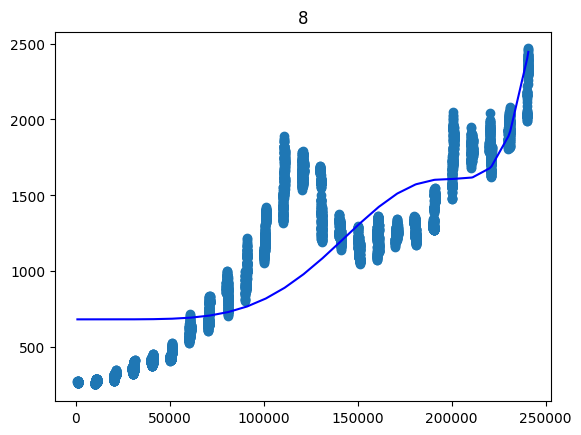

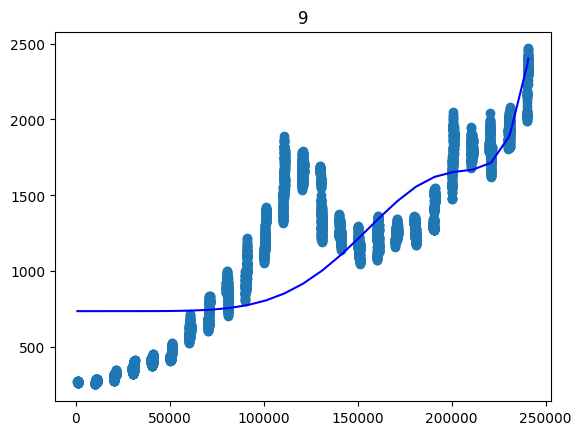

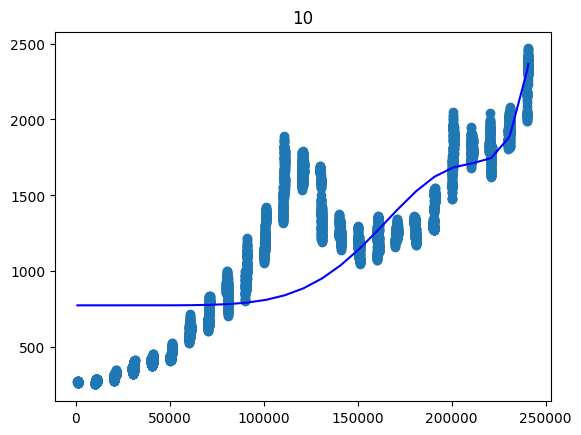

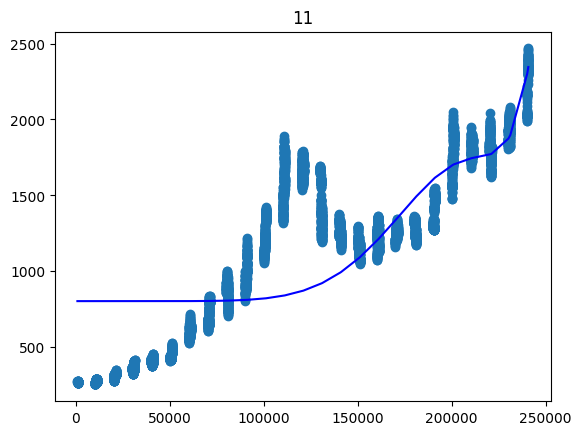

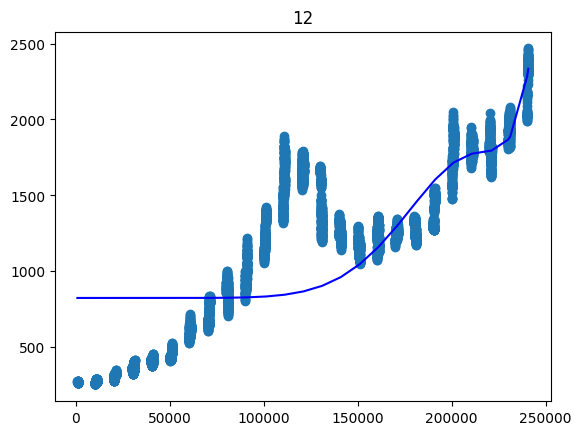

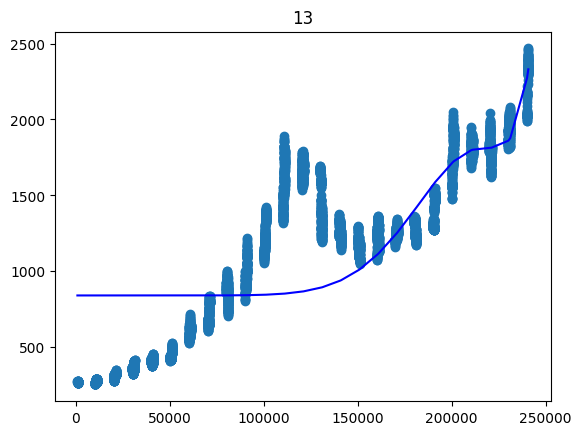

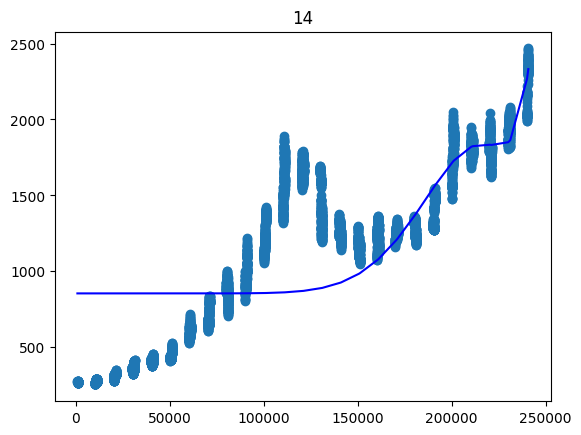

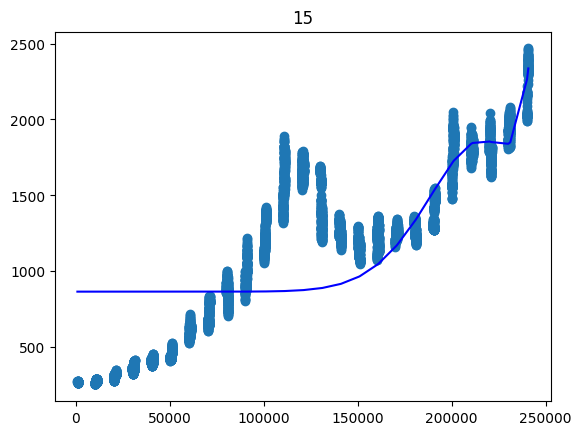

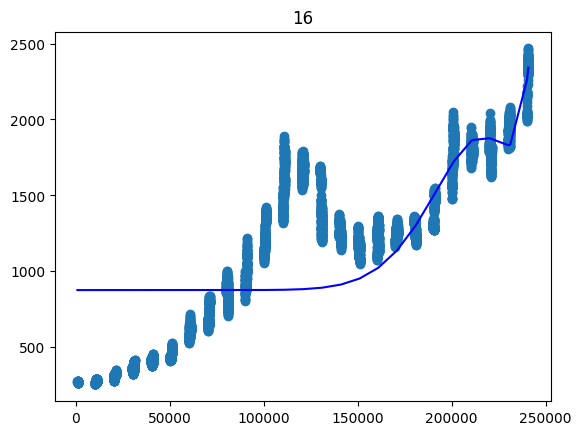

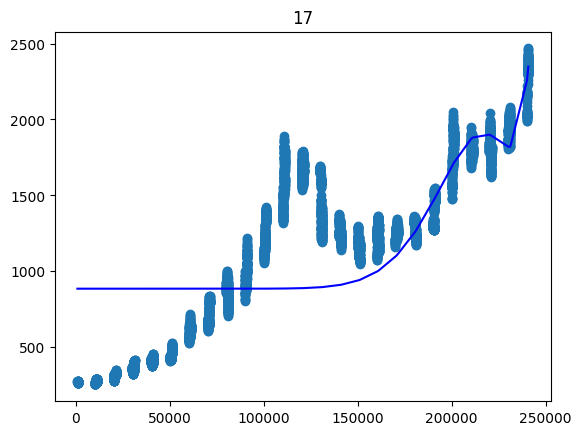

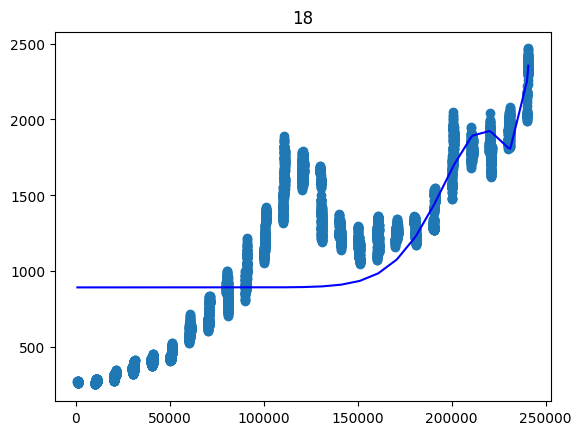

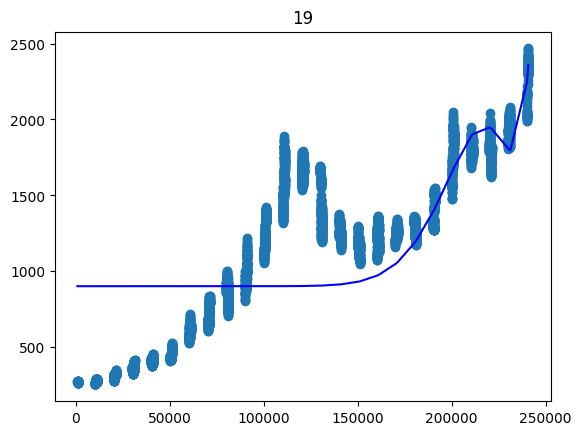

In [282]:
for i in range(20):
    # create a encoder object
    polynomial_features = PolynomialFeatures(degree=i)
    
    # preprocess the data to get the polynomials of X
    x_polynomial = polynomial_features.fit_transform(x)
    x_polynomial
    
    ### create Linear Regression Model
    from sklearn.linear_model import LinearRegression
    
    model = LinearRegression()
    model.fit(x_polynomial, y)
    
    plt.scatter(x['date_num'], y, label="data")
    plt.plot(x['date_num'], model.predict(x_polynomial), color="blue")
    plt.title(i)
    plt.show()

# Visually polynomial regression with degree =  5 is best

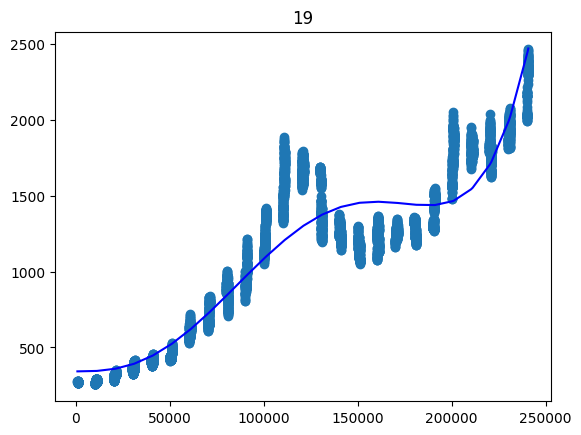

In [283]:
x = df[['date_num']]
y = df['Close']
polynomial_features = PolynomialFeatures(degree=5)

# preprocess the data to get the polynomials of X
x_polynomial = polynomial_features.fit_transform(x)
x_polynomial

### create Linear Regression Model
from sklearn.linear_model import LinearRegression

pr_model = LinearRegression()
pr_model.fit(x_polynomial, y)

plt.scatter(x['date_num'], y, label="data")
plt.plot(x['date_num'], pr_model.predict(x_polynomial), color="blue")
plt.title(i)
plt.show()

# prediction

In [284]:
#given_date=pd.DataFrame({'date_num':[241102,241203,240802]})
#y_pred=model.predict(given_date)


given_date=pd.DataFrame({'date':['2021-02-21','2024-08-12','2025-02-11','2002-03-12']})
#given_date=pd.DataFrame({'date_num':[2021-02-21,2024-08-12,2025-02-11,2002-03-12]})
#given_date=pd.DataFrame({'date_num':["2021-02-21","2024-08-12","2025-02-11","2002-03-12"]})
given_date['date_num']=(pd.DatetimeIndex(given_date['date']).year%100)*10000\
                +pd.DatetimeIndex(given_date['date']).month*100 \
                +pd.DatetimeIndex(given_date['date']).day
y_pred=LR_model.predict(given_date[['date_num']])
#print(y_pred)
pred_result=given_date.assign(LR_Close=y_pred)
pred_result

,date,date_num,LR_Close
0,2021-02-21,210221,1775.760364
1,2024-08-12,240812,1999.446358
2,2025-02-11,250211,2068.173260
3,2002-03-12,20312,387.117188


In [285]:
given_date=pd.DataFrame({'date':['2021-02-21','2024-08-12','2025-02-11','2002-03-12']})
#given_date=pd.DataFrame({'date_num':[2021-02-21,2024-08-12,2025-02-11,2002-03-12]})
#given_date=pd.DataFrame({'date_num':["2021-02-21","2024-08-12","2025-02-11","2002-03-12"]})
given_date['date_num']=(pd.DatetimeIndex(given_date['date']).year%100)*10000\
                +pd.DatetimeIndex(given_date['date']).month*100 \
                +pd.DatetimeIndex(given_date['date']).day

#given_date_num=pd.DataFrame({'date_num':[241102,241203,240802,101212]})
y_pred=LR_PCA_model.predict(given_date[['date_num']])
#print(y_pred)
pred_result=given_date.assign(LR_PCA_Close=y_pred)
pred_result

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,date,date_num,LR_PCA_Close
0,2021-02-21,210221,-398.878328
1,2024-08-12,240812,-622.564321
2,2025-02-11,250211,-691.291223
3,2002-03-12,20312,989.764848


In [286]:
given_date=pd.DataFrame({'date':['2021-02-21','2024-08-12','2025-02-11','2002-03-12']})
#given_date=pd.DataFrame({'date_num':[2021-02-21,2024-08-12,2025-02-11,2002-03-12]})
#given_date=pd.DataFrame({'date_num':["2021-02-21","2024-08-12","2025-02-11","2002-03-12"]})
given_date['date_num']=(pd.DatetimeIndex(given_date['date']).year%100)*10000\
                +pd.DatetimeIndex(given_date['date']).month*100 \
                +pd.DatetimeIndex(given_date['date']).day
x_polynomial = polynomial_features.fit_transform(given_date[['date_num']])
#given_date_num=pd.DataFrame({'date_num':[241102,241203,240802,101212]})
y_pred=pr_model.predict(x_polynomial)
#print(y_pred)
pred_result=given_date.assign(PR_Close=y_pred)
pred_result

,date,date_num,PR_Close
0,2021-02-21,210221,1541.400231
1,2024-08-12,240812,2472.018369
2,2025-02-11,250211,3108.760173
3,2002-03-12,20312,357.296091


In [287]:
# Exporting model weights

In [288]:
from joblib import Parallel, delayed 
import joblib 


# Save the model as a pickle in a file 
joblib.dump(LR_model, 'LR_model.pkl') 

# Load the model from the file 
#LR_model = joblib.load('LR_model.pkl') 

# Use the loaded model to make predictions 
#LR_model.predict(X_test) 


['LR_model.pkl']

In [289]:
from joblib import Parallel, delayed 
import joblib 


# Save the model as a pickle in a file 
joblib.dump(pr_model, 'pr_model.pkl') 

['pr_model.pkl']

In [290]:
# testing import

In [291]:
from joblib import Parallel, delayed 
import joblib 
load_model = joblib.load('LR_model.pkl') 

# Use the loaded model to make predictions 
load_model.predict(x_test) 

array([ 755.59838457,  975.07989187, 1485.37293391, ..., 1701.86377168,
       1924.2189541 , 1338.39871027])

# Model evaluation

In [292]:
# get the predicted data
y_pred = LR_model.predict(x_test)

# getting the true values
y_true = y_test
from sklearn.metrics import mean_absolute_error

# mean absolute error (MAE)
mae = mean_absolute_error(y_true, y_pred)
mae

from sklearn.metrics import mean_squared_error

# mean squared error (MSE)
mse = mean_squared_error(y_true, y_pred)
mse

from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_true, y_pred)
rmse

from sklearn.metrics import r2_score

# R-squared score
r2 = r2_score(y_true, y_pred)
print(mae,mse,rmse,r2)

166.57987596710916 52429.61518651082 228.9751409793448 0.8289529446049237


In [293]:
# get the predicted data
y_pred = LR_PCA_model.predict(x_test)
# getting the true values
y_true = y_test
from sklearn.metrics import mean_absolute_error

# mean absolute error (MAE)
mae = mean_absolute_error(y_true, y_pred)
mae

from sklearn.metrics import mean_squared_error

# mean squared error (MSE)
mse = mean_squared_error(y_true, y_pred)
mse

from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_true, y_pred)
rmse

from sklearn.metrics import r2_score

# R-squared score
r2 = r2_score(y_true, y_pred)
r2
print(mae,mse,rmse,r2)

1139.6062398176377 1829094.6786236945 1352.440268042805 -4.967262160983392


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [294]:
# # Import necessary libraries
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report
# import warnings
# warnings.filterwarnings('ignore')

# # Select relevant features and target variable
# X = df[['date_num']]
# y = df['Close']

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a Random Forest Classifier
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# # Train the classifier
# rf_classifier.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = rf_classifier.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# # Print the results
# print(f"Accuracy: {accuracy}")
# #print(f&quot;Accuracy: {accuracy:.2f}&quot;)
# print("\nClassification Report:\n {classification_rep}")


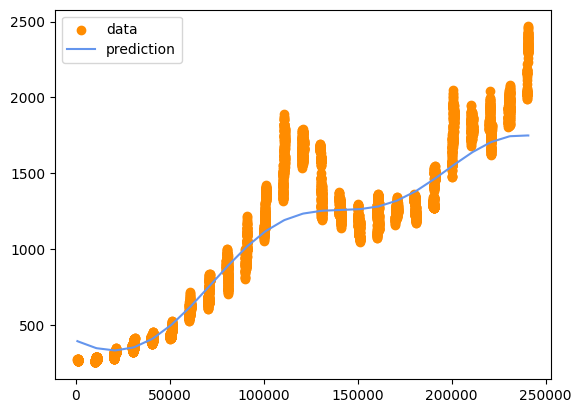

['svr_model.pkl']

In [295]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.svm import SVR 

# generate synthetic data 
X=df[['date_num']]
y=df['Close']

# create an SVR model with a linear kernel 
svr_model = SVR(kernel='rbf') 

# train the model on the data 
svr_model.fit(X, y) 

# make predictions on the data 
y_pred = svr_model.predict(X) 

# plot the predicted values against the true values 
plt.scatter(X, y, color='darkorange', 
			label='data') 
plt.plot(X, y_pred, color='cornflowerblue', 
		label='prediction') 
plt.legend() 
plt.show() 

from joblib import Parallel, delayed 
import joblib 


# Save the model as a pickle in a file 
joblib.dump(svr_model, 'svr_model.pkl') 

In [296]:
# get the predicted data
y_pred = svr_model.predict(x_test)
# getting the true values
y_true = y_test
from sklearn.metrics import mean_absolute_error

# mean absolute error (MAE)
mae = mean_absolute_error(y_true, y_pred)
mae

from sklearn.metrics import mean_squared_error

# mean squared error (MSE)
mse = mean_squared_error(y_true, y_pred)
mse

from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_true, y_pred)
rmse

from sklearn.metrics import r2_score

# R-squared score
r2 = r2_score(y_true, y_pred)
r2
print(mae,mse,rmse,r2)

127.93892791360489 36103.64694264555 190.0095969751148 0.8822149947773832


In [297]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
X = df[['date_num']]
y = df['Close']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, 
                                                    random_state=42)

clf = DecisionTreeRegressor(max_depth=3,random_state=2021)
clf2 = clf.fit(X_train, y_train)

###################################################################
import graphviz 
from sklearn import tree
# =============================================================================
# dot_data = tree.export_graphviz(clf2, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("Housing") 
# =============================================================================
dot_data = tree.export_graphviz(clf2, out_file=None, 
                         feature_names=list(X_train),  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

###################################################################

y_pred = clf2.predict(X_test)

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(mean_squared_error(y_test, y_pred) )
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

#######################Grid Search CV#############################
depth_range = [3,4,5,6,7,8,9]
minsplit_range = [5,10,20,25,30]
minleaf_range = [5,10,15]

parameters = dict(max_depth=depth_range,
                  min_samples_split=minsplit_range, 
                  min_samples_leaf=minleaf_range)

from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=2021,shuffle=True)
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeRegressor(random_state=2021)
cv = GridSearchCV(clf, param_grid=parameters,
                  cv=kfold,scoring='r2')

cv.fit(X,y)
# Best Parameters
print(cv.best_params_)

print(cv.best_score_)

cv.best_estimator_
from joblib import Parallel, delayed 
import joblib 


# Save the model as a pickle in a file 
joblib.dump(cv, 'dt_model.pkl') 

13921.733641568058
81.74315809851838
0.9555376229781797
{'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.9978895138503543


['dt_model.pkl']

In [298]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split 

X = df[['date_num']]
y = df['Close']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=2018)

from xgboost import XGBRegressor
clf = XGBRegressor()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

#def mean_absolute_percentage_error(y_true, y_pred): 
#    y_true, y_pred = np.array(y_true), np.array(y_pred)
#    return np.mean(np.abs((y_true - y_pred) / y_true))
#
#print(mean_absolute_percentage_error(y_test,y_pred))

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

################ Tunning XG Boost ##################################

lr_range = [0.001, 0.01, 0.1, 0.2,0.25, 0.3]
n_est_range = [10,20,30,50,100]
md_range = [2,4,6,8,10]

parameters = dict(learning_rate=lr_range,
                  n_estimators=n_est_range,
                  max_depth=md_range)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=42,shuffle=True)

clf = XGBRegressor(random_state=1211)
cv = GridSearchCV(clf, param_grid=parameters,
                  cv=kfold,scoring='r2')

cv.fit(X,y)

print(cv.best_params_)

print(cv.best_score_)
from joblib import Parallel, delayed 
import joblib 


# Save the model as a pickle in a file 
joblib.dump(cv, 'xgb_model.pkl') 

788.0654801790309
19.115177571343768
0.9974232299471844
{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}
0.9976473218904447


['xgb_model.pkl']